In [2]:
import os 
# Go one folder back
os.chdir('..')
from Python_scripts.data_processing import *
from Python_scripts.log_likelihood import *
from Python_scripts.utilities import *

import glob
import numpy as np
import pymc3 as pm
import theano.tensor as tt   

import ast
utility_class = utility_functions()

data=pd.read_csv('Data/all_combined.csv')
#import data in format
# Subject, chooce ,receivor, Wait2.RT, targettxt ,gender ,age ,As ,Ao
# subID,list, list ,list ,list, bool ,float ,float ,float

/home/mikkel/git/Bachelor_project/Python_scripts/data_processing.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ug_1['choose'][ug_1.choose != '�ܾ�'] = 1
/home/mikkel/git/Bachelor_project/Python_scripts/data_processing.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ug_1['choose'][ug_1.choose == '�ܾ�'] = 0
/home/mikkel/git/Bachelor_project/Python_scripts/data_processing.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ug_

In [3]:
#number_of_pareiters = List of len = len(us) where eache element in the list is the number of paremeters that the i models take
#eks us = [u1,u5] , number_of_pareiters=[1,2]
#min_peremiter is a list1[list2[]] where list 2 have len of number_of_pareiters
#eks us = [u1,u5] , number_of_pareiters=[1,2] , min_peremiter[[0],[1, 2]]
def multimodels(person, us, utility_functions_class, N_SAMPLES = 5000,sim=False,sim_data=None):
    if sim:
        print(type(sim_data))
        receivor=sim_data[0]
        utility_functions_class.set_responder(receivor)
        choice=sim_data[1]
    else:
        receivor=ast.literal_eval(data['receivor'][person])[0:40] if ast.literal_eval(data['receivor'][person])[0] >= 0 else ast.literal_eval(data['receivor'][person])[40:]
        receivor=np.array(receivor)
        utility_functions_class.set_responder(receivor)
        choice=ast.literal_eval(data['choose'][person])[0:40] if ast.literal_eval(data['receivor'][person])[0] >= 0 else ast.literal_eval(data['choose'][person])[40:]
        choice=np.array(choice)
        # np.isnan() can now be applied on "choice"
        choice = np.array([0 if np.isnan(x) else x for x in choice])
        print(f'subjet {data["Subject"][person]}')

    
    lambdas=[]
    with pm.Model() as model:
        number_of_models=6
        # creat paremiters
        #
        alpah_1= pm.Gamma('alpha_1', alpha = 2, beta = 0.5)

        #
        alpah_2= pm.Gamma('alpha_2', alpha = 2, beta = 0.5)
        lamda_2=pm.Uniform(f'lamda_2', lower = -1, upper =1)

        #
        lamda_3=pm.Uniform(f'lamda_3', lower = -1, upper =1)
        lamda_4=pm.Uniform(f'lamda_4', lower = -1, upper =1)

        #
        lamda_5=pm.Uniform(f'lamda_5', lower = -1, upper =1)
        lamda_6=pm.Uniform(f'lamda_6', lower = -1, upper =1)

        #
        lamda_7=pm.Uniform(f'lamda_7', lower = -1, upper =1)
        lamda_8=pm.Uniform(f'lamda_8', lower = -1, upper =1)

        #
        lamda_9=pm.Uniform(f'lamda_9', lower = -1, upper =1)
        lamda_10=pm.Uniform(f'lamda_10', lower = -1, upper =1)
        lamda_11=pm.Uniform(f'lamda_11', lower = -1, upper =1)


        #lambdas is list[list] 

        #creat switch
        prop=[1/number_of_models]*number_of_models
        switch=pm.Categorical('switch',prop)
        
    
        # calculate P based on switch
   
        p = pm.Deterministic('p',
                             pm.math.switch(pm.math.eq(0, switch),utility_functions_class.P(us[0](alpah_1)),
                             pm.math.switch(pm.math.eq(2, switch),utility_functions_class.P(us[1]([alpah_2,lamda_2])),
                             pm.math.switch(pm.math.eq(1, switch),utility_functions_class.P(us[2]([lamda_3,lamda_4])),
                             pm.math.switch(pm.math.eq(3, switch),utility_functions_class.P(us[3]([lamda_5,lamda_6])),
                             pm.math.switch(pm.math.eq(4, switch),utility_functions_class.P(us[4]([lamda_7,lamda_8])),
                             utility_functions_class.P(us[5]([[lamda_9,lamda_10],lamda_11])),
                             ))))))



        observed = pm.Bernoulli('obs', p, observed = choice)
        # Perform sampling
        #trace = pm.sample(2000, tune=1000, return_inferencedata=True)

        step = pm.Metropolis()

            # Sample from the posterior using the sampling method
        trace = pm.sample(N_SAMPLES, step=step)

        # Sample from the posterior using MCMC
        #trace = pm.sample(5000, tune=1000, target_accept=0.9)

    # Print the summary of the posterior distribution
    #pm.summary(trace)
    return trace


# Exampel MCMC

In [7]:

person = 1

utility_class
us=[utility_class.Fehr_Schmidt,
    utility_class.multiplication_us(utility_class.Fehr_Schmidt,utility_class.U2),
    utility_class.add_us(utility_class.U3,utility_class.U4),
    utility_class.add_us(utility_class.U2,utility_class.U4),
    utility_class.U5,
    utility_class.add_us(utility_class.U5,utility_class.U4),
    ]


trace_multimodels = multimodels(person, us, utility_class, N_SAMPLES = 5000)



subjet 9


/home/mikkel/miniconda3/envs/Batcheler/lib/python3.10/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [switch]
>Metropolis: [lamda_11]
>Metropolis: [lamda_10]
>Metropolis: [lamda_9]
>Metropolis: [lamda_8]
>Metropolis: [lamda_7]
>Metropolis: [lamda_6]
>Metropolis: [lamda_5]
>Metropolis: [lamda_4]
>Metropolis: [lamda_3]
>Metropolis: [lamda_2]
>Metropolis: [alpha_2]
>Metropolis: [alpha_1]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 16 seconds.
The rhat statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.


# Plots

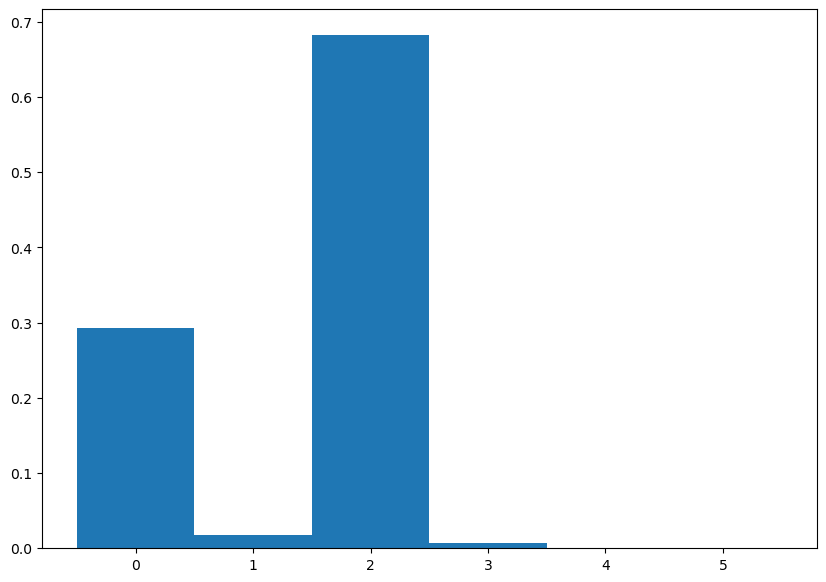

In [ ]:
switch_plot = trace_multimodels.get_values('switch', combine = True,burn=1000)
#plt.bar(switch_plot, [0, 1, 2, 3, 4, 5])

# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(switch_plot, bins = 6, range = (0,6), density = True, align = 'left')
 
# Show plot
plt.show()

# Run on all persons

In [ ]:

us=[utility_class.Fehr_Schmidt,
    utility_class.multiplication_us(utility_class.Fehr_Schmidt,utility_class.U2),
    utility_class.add_us(utility_class.U3,utility_class.U4),
    utility_class.add_us(utility_class.U2,utility_class.U4),
    utility_class.U5,
    utility_class.add_us(utility_class.U5,utility_class.U4),
    ]


for i in range(len(data)):
    person = i
    trace_multimodels = multimodels(person, us, utility_class, N_SAMPLES = 5000)
    result = trace_multimodels['switch', 1000:]
    #result = trace_multimodels.get_values('switch', burn=1000, combine=False)
    np.savez(f'MCMC_tests/multi_mcmc_sub_{i}.npz', result)
    print(f'person: {i} saved')

# Simulated data

In [4]:
rep=1000
lamb=0.5

sim_u = utility_class.Fehr_Schmidt

resiver=[None]*rep*5
print(len(resiver))
prop=[None]*rep*5
choise=[None]*rep*5
for i in range(rep):
    for resiv in range(1,6):
        utility_class.set_responder(resiv)
        resiver[(i*5)+resiv-1]=resiv

        # Defin the u func
        u=sim_u(lamb)

        #calculate the p
        p_sim=utility_class.P(u)
        prop[(i*5)+resiv-1]=p_sim
        #Simulate from binomial distrabusing 
        choise[(i*5)+resiv-1]=np.random.binomial(n=1, p=p_sim)

resiver=np.array(resiver)      
choise = np.array([0 if np.isnan(x) else x for x in choise])
type(choise)  

5000


numpy.ndarray

In [ ]:
us=[utility_class.Fehr_Schmidt,
    utility_class.multiplication_us(utility_class.Fehr_Schmidt,utility_class.U2),
    utility_class.add_us(utility_class.U3,utility_class.U4),
    utility_class.add_us(utility_class.U2,utility_class.U4),
    utility_class.U5,
    utility_class.add_us(utility_class.U5,utility_class.U4),
    ]



trace_multimodels = multimodels(9, us, utility_class, N_SAMPLES = 5000,sim=True,sim_data=(resiver,choise))

result = trace_multimodels.get_values('switch', burn=1000, combine=False)
np.savez(f'MCMC_tests/trace_v1_simdata_{sim_u}_{lamb}.npz', result)

switch_plot = trace_multimodels.get_values('switch', combine = True,burn=1000)


[12000, 4000, 0, 0, 0, 0]


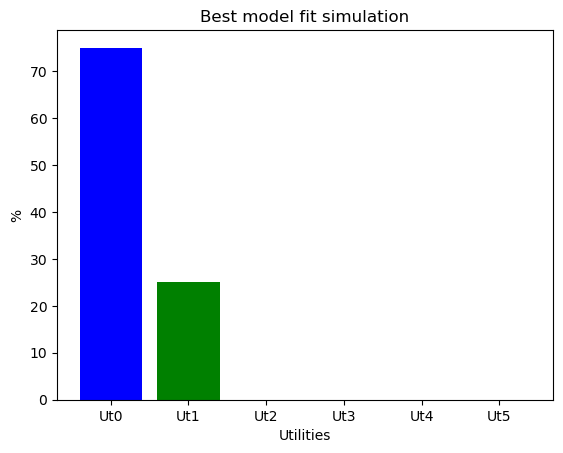

In [7]:
us =['Ut0', 'Ut1', 'Ut2', 'Ut3', 'Ut4', 'Ut5']
result_list = [np.count_nonzero(switch_plot == j) for j in range(6)]
print(result_list)
result_list=result_list/np.sum(result_list)
counts = result_list
# Plot the bar chart
plt.bar(us, counts*100, color = ['blue', 'green', 'green', 'green', 'green', 'green'])
# Set the title and axis labels
plt.title('Best model fit simulation')
plt.xlabel('Utilities')
plt.ylabel('%')
# Display the plot
plt.show()